### 학습목표
- 데이터 분석을위한 시각화 방법에 대해 알아보자
- 데이터를 한눈에 보고 쉽게 이해할 수 있는 시각화를 진행해보자
  

- pandas에서 제공하는 plt 함수 활용 시각화 가능
- matplotlib, seaborn 라이브러리 활용 시각화
   - 하나하나 시각화하여 그래프 출력, 커스터마이징에 용이
   - 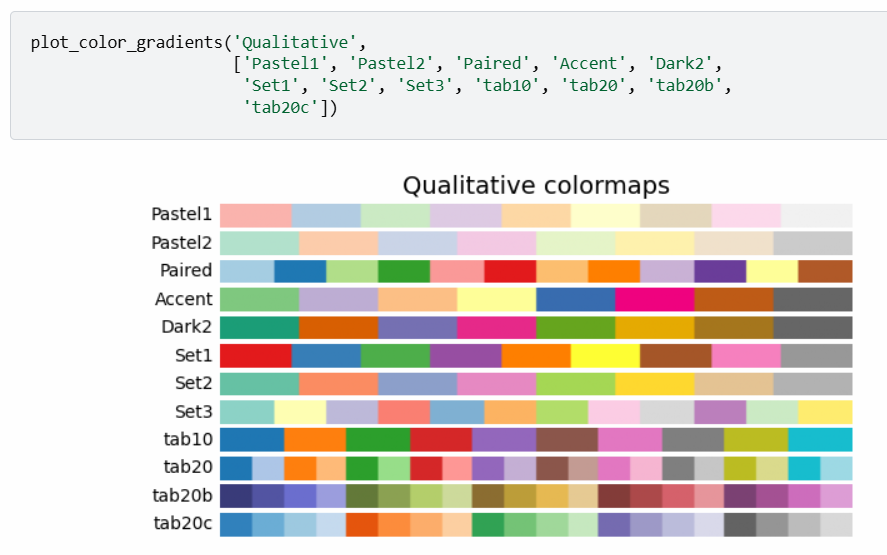

In [1]:
import numpy as np #수치 계산
import pandas as pd #행, 열의 표와 같은 데이터 다루기
import matplotlib.pyplot as plt #그래프를 통한 시각화
import seaborn as sns 

In [2]:
#hr_info 읽어오기
hr_info= pd.read_csv('data/hr-info.csv', encoding='EUC-KR')
hr_info.head()

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
3,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
4,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y


#### 1. Line Chart
- 연도별 입사자 추세 확인


In [3]:
# 연도별 입사자의 추세 확인 
#연도라는 기준이 있음. 

In [4]:
hr_info.info()
#RETIRE_DATE (입사 연월일 데이터) - 문자열 -> 날짜 타입 변경 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EID                 200 non-null    object 
 1   ENAME               200 non-null    object 
 2   GENDER              200 non-null    object 
 3   ORG_CD              197 non-null    object 
 4   POS_CD              200 non-null    object 
 5   AGE                 200 non-null    int64  
 6   SERVICE_YEAR        200 non-null    int64  
 7   EDU_LEVEL           200 non-null    object 
 8   PERFORMANCE_SCORE   200 non-null    float64
 9   SALARY              200 non-null    int64  
 10  LAST_PROMO_DT       182 non-null    object 
 11  TRAINING_HOURS      200 non-null    int64  
 12  SKILLS              200 non-null    object 
 13  ACTIVE_STATE        200 non-null    object 
 14  HIRE_DATE           200 non-null    object 
 15  RETIRE_DATE         49 non-null     object 
 16  RETIRE_R

In [5]:
hr_info= pd.read_csv('data/hr-info.csv', encoding='EUC-KR' , parse_dates = ['HIRE_DATE'])
hr_info.info()
#HIRE_DATE 컬럼 데이터 타입 -> datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   EID                 200 non-null    object        
 1   ENAME               200 non-null    object        
 2   GENDER              200 non-null    object        
 3   ORG_CD              197 non-null    object        
 4   POS_CD              200 non-null    object        
 5   AGE                 200 non-null    int64         
 6   SERVICE_YEAR        200 non-null    int64         
 7   EDU_LEVEL           200 non-null    object        
 8   PERFORMANCE_SCORE   200 non-null    float64       
 9   SALARY              200 non-null    int64         
 10  LAST_PROMO_DT       182 non-null    object        
 11  TRAINING_HOURS      200 non-null    int64         
 12  SKILLS              200 non-null    object        
 13  ACTIVE_STATE        200 non-null    object        

In [6]:
#입사 연도 추출
hr_info['HIRE_DATE'].dt.year

0      1999
1      2000
2      2002
3      2006
4      2005
       ... 
195    2024
196    2024
197    2024
198    2024
199    2024
Name: HIRE_DATE, Length: 200, dtype: int32

In [7]:
# 'HIRE_YEAR'컬럼 추가
hr_info['HIRE_YEAR'] = hr_info['HIRE_DATE'].dt.year
hr_info

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,...,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION,HIRE_YEAR
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,...,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y,1999
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,...,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y,2000
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,...,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y,2002
3,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,...,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y,2006
4,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,...,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,E00322,부탐회,F,ORG014,P009,23,0,학사 학위,0.00,4500,...,4,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N,2024
196,E00389,초두반,F,ORG012,P009,23,0,학사 학위,0.00,4500,...,4,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N,2024
197,E00438,권개득,M,ORG024,P009,23,0,학사 학위,0.00,4500,...,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N,2024
198,E00304,탐출조,M,ORG009,P009,24,0,학사 학위,0.00,4500,...,4,Salesforce,Y,2024-09-01,NaN,NaN,NaN,KOREA,N,2024


In [8]:
# 각 연도별 입사자 수 확인 
hr_info['HIRE_YEAR'].value_counts()
#연도의 순서대로 표현 -> 정렬 
#hr_info.sort_values(by = 'HIRE_YEAR').value_counts()
#연도의 정보는 series의 index에 있음!
hire_year_info = hr_info['HIRE_YEAR'].value_counts().sort_values()

<Axes: xlabel='HIRE_YEAR', ylabel='HIRE_COUNT'>

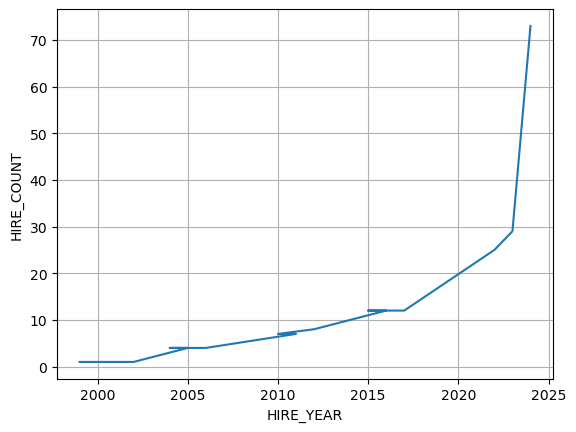

In [9]:
#plot() -> pd에서 제공하는 시각화 기능
hire_year_info.plot( kind = 'line' ,
                   xlabel = 'HIRE_YEAR',
                   ylabel = 'HIRE_COUNT',
                   grid = True) #모눈종이 모양 
#line chart 변화 추이를 확인할 때 용이  #출산률, 주식 


2. bar chart
   - 학위별 평균 연봉 시각화

In [10]:
#'EDU_LEVEL','SALARY' 가져오기
hr_info[['EDU_LEVEL','SALARY']]

,EDU_LEVEL,SALARY
0,박사 학위,10200
1,박사 학위,9500
2,박사 학위,9100
3,박사 학위,8500
4,박사 학위,8600
...,...,...
195,학사 학위,4500
196,학사 학위,4500
197,학사 학위,4500
198,학사 학위,4500


In [11]:
#학위별 평균 연봉 계산
sal_mean = hr_info [['EDU_LEVEL','SALARY']].groupby(by='EDU_LEVEL').mean()
sal_mean

,SALARY
EDU_LEVEL,
고등학교 졸업,6140.000000
박사 학위,8166.666667
석사 학위,6900.000000
전문대 학위,5050.000000
학사 학위,5727.044025


In [12]:
#한글 인코딩코드 
plt.rc( 'font', family = 'Malgun Gothic')

<Axes: xlabel='EDU_LEVEL'>

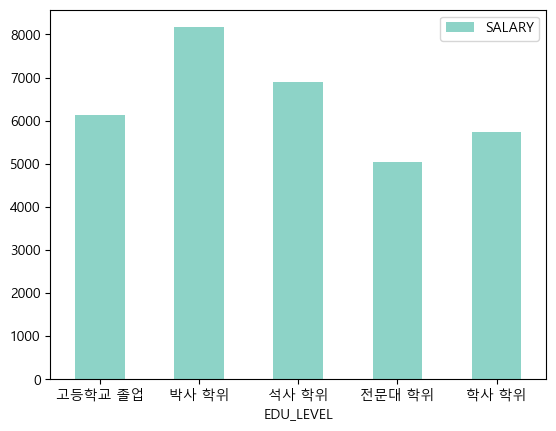

In [13]:
sal_mean.plot( kind = 'bar', colormap = 'Set3', rot =0)
#rotation 글씨 회전 
#인덱스 이름이 한글 -> 기본 폰트는 지원이 안됨 -> 폰트 바꿔주기 

- 학위, 성별을 고려한 평균 연봉 시각화 

In [14]:
#EDU_LEVEL, GENDER 
sal_mean2 =hr_info[['EDU_LEVEL','SALARY','GENDER']].groupby(by = ['EDU_LEVEL','GENDER']).mean().round(2)
sal_mean2

SALARY
EDU_LEVEL GENDER         
고등학교 졸업   F       6200.00
          M       6100.00
박사 학위     F       8425.00
          M       8037.50
석사 학위     F       7233.33
          M       6525.00
전문대 학위    F       5600.00
          M       4500.00
학사 학위     F       5643.08
          M       5785.11

<Axes: xlabel='EDU_LEVEL,GENDER'>

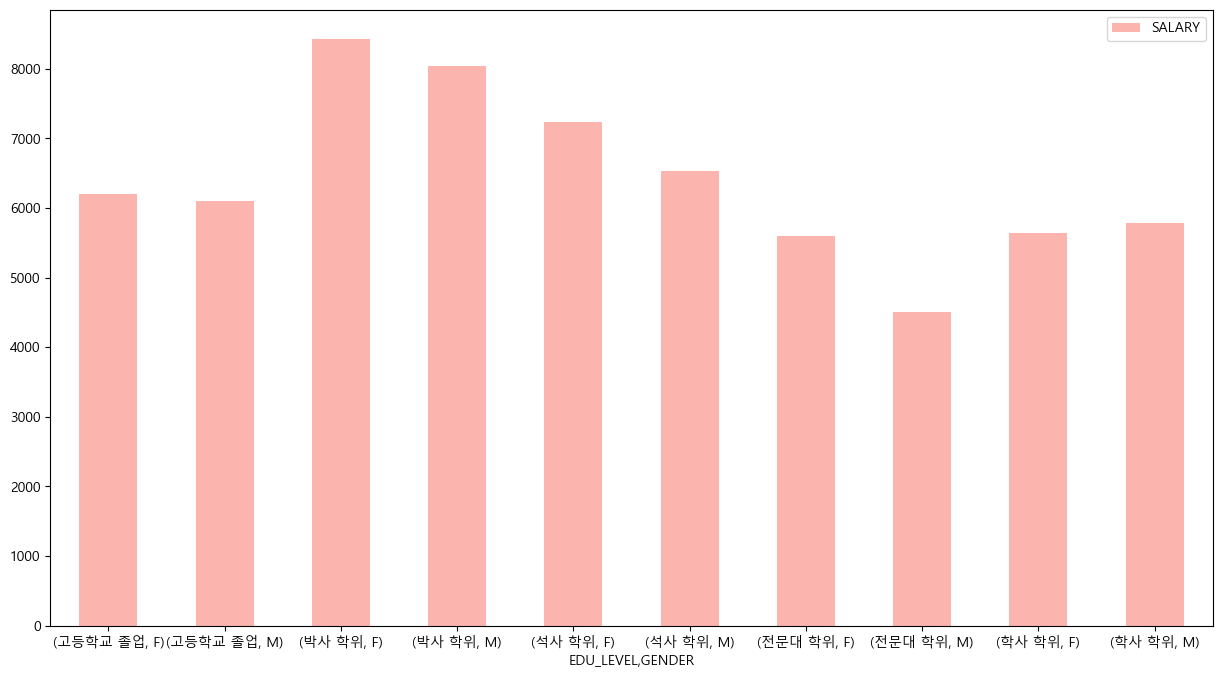

In [15]:
sal_mean2.plot( kind = 'bar', rot=0 ,figsize=(15,8), colormap='Pastel1')

In [16]:
sal_mean2.reset_index() #rest_index(): 인덱스를 리셋(컬럼으로)
#index -학위, column - 성별

,EDU_LEVEL,GENDER,SALARY
0,고등학교 졸업,F,6200.00
1,고등학교 졸업,M,6100.00
2,박사 학위,F,8425.00
3,박사 학위,M,8037.50
4,석사 학위,F,7233.33
5,석사 학위,M,6525.00
6,전문대 학위,F,5600.00
7,전문대 학위,M,4500.00
8,학사 학위,F,5643.08
9,학사 학위,M,5785.11


In [17]:
sal_mean2.reset_index().pivot(index = 'EDU_LEVEL', columns ='GENDER' ,values = 'SALARY').round(2)

GENDER,F,M
EDU_LEVEL,,
고등학교 졸업,6200.00,6100.00
박사 학위,8425.00,8037.50
석사 학위,7233.33,6525.00
전문대 학위,5600.00,4500.00
학사 학위,5643.08,5785.11


In [18]:
#학위, 성별을 고려한 평균 연봉 시각화2
sal_mean2_2 = sal_mean2.reset_index().pivot(index = 'EDU_LEVEL', columns ='GENDER' ,values = 'SALARY').round(2)

<Axes: title={'center': '교육수준과 성별에 따른 평균연봉 비교'}, xlabel='평균연봉', ylabel='교육수준'>

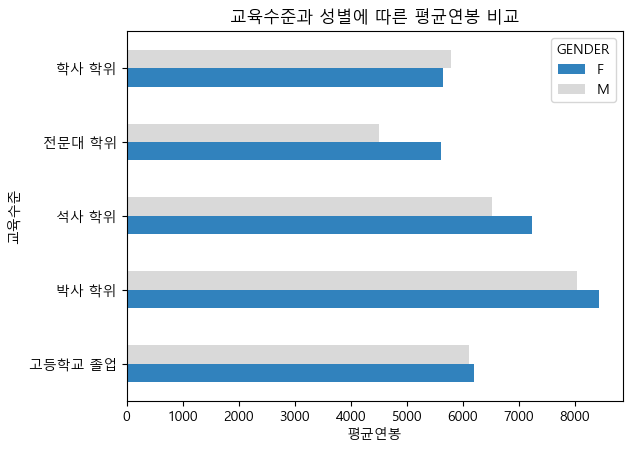

In [19]:
sal_mean2_2.plot( kind = 'barh', colormap ='tab20c'
                 , xlabel ='평균연봉', ylabel ='교육수준'
                , title = '교육수준과 성별에 따른 평균연봉 비교')
# 'bar' : vertical bar plot 수직 막대 그래프
# 'barh' : horizontal bar plot 수평막대그래프

array([<Axes: title={'center': 'F'}, xlabel='평균연봉', ylabel='교육수준'>,
       <Axes: title={'center': 'M'}, xlabel='평균연봉', ylabel='교육수준'>],
      dtype=object)

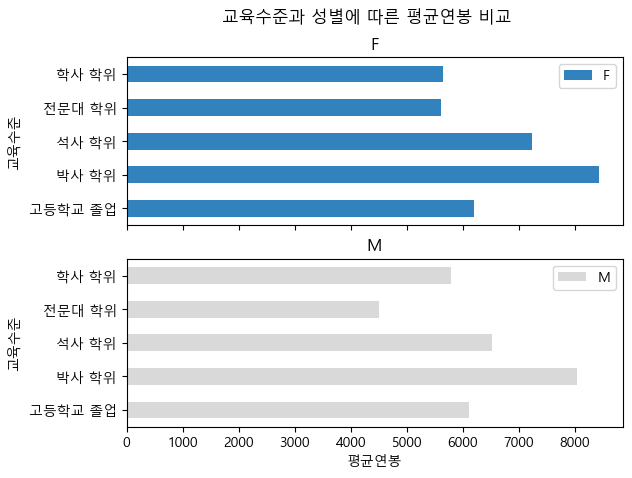

In [20]:
sal_mean2_2.plot( kind = 'barh', colormap ='tab20c'
                 , xlabel ='평균연봉', ylabel ='교육수준'
                , title = '교육수준과 성별에 따른 평균연봉 비교', subplots=True)

- 부서별 평균 연봉 비교하기


In [21]:
#조직정보 불러오기 
org_info = pd.read_csv('./data/org-info.csv', encoding='EUC-KR')
org_info

,ORG_CD,ENG_DIVISION,KOR_DIVISION,ENG_DEPARTMENT,KOR_DEPARTMENT,Team,KOR_TEAM,Role
0,ORG001,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Product Management Team,TV 제품 관리 팀,관리 및 마케팅 전략 수립을 통해 TV 제품의 전체 라이프사이클을 관리합니다.
1,ORG002,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Marketing Team,TV 마케팅 팀,"TV 제품의 시장 진입 전략을 수립하고, 광고 및 프로모션 활동을 기획합니다."
2,ORG003,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Customer Support Team,TV 고객 지원 팀,TV 고객 지원 서비스 제공 및 고객 만족도를 높이기 위한 해결책을 제공합니다.
3,ORG004,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS Core Development Team,webOS 핵심 개발 팀,webOS 플랫폼의 핵심 기능 개발 및 유지보수를 담당합니다.
4,ORG005,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS User Interface Team,webOS 사용자 인터페이스 팀,webOS의 사용자 인터페이스 디자인 및 개선을 담당합니다.
5,ORG006,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS Quality Assurance Team,webOS 품질 보증 팀,webOS 소프트웨어의 품질 검증 및 테스트를 수행합니다.
6,ORG007,Vehicle Solutions Division,VS사업본부,Global Customer Strategy Department,글로벌고객전략담당,Global Sales Strategy Team,글로벌 판매 전략 팀,"글로벌 판매 전략을 수립하고, 주요 시장에서의 판매 목표를 설정합니다."
7,ORG008,Vehicle Solutions Division,VS사업본부,Global Customer Strategy Department,글로벌고객전략담당,Key Account Management Team,주요 고객 관리 팀,"주요 고객과의 관계를 관리하고, 맞춤형 솔루션을 제공합니다."
8,ORG009,Vehicle Solutions Division,VS사업본부,Global Customer Strategy Department,글로벌고객전략담당,Customer Insights Team,고객 통찰 팀,"고객 데이터를 분석하여 인사이트를 도출하고, 이를 기반으로 제품 및 서비스 개선안을..."
9,ORG010,Vehicle Solutions Division,VS사업본부,VS Asia Sales/PM Department,VS아시아영업/PM담당,Asia Regional Sales Team,아시아 지역 판매 팀,"아시아 지역에서의 판매 활동을 관리하고, 시장 진입 전략을 수립합니다."


In [22]:
#조직 정보와 직원 정보 병합 (concat, merge)
#hr_info와 org_info 합쳐주기 
org_hr_merge = pd.merge(hr_info, org_info, how = 'inner' , on='ORG_CD')
org_hr_merge

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,...,NATION,ROUNDING_DEDUCTION,HIRE_YEAR,ENG_DIVISION,KOR_DIVISION,ENG_DEPARTMENT,KOR_DEPARTMENT,Team,KOR_TEAM,Role
0,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,...,KOREA,Y,2006,Vehicle Solutions Division,VS사업본부,Global Customer Strategy Department,글로벌고객전략담당,Global Sales Strategy Team,글로벌 판매 전략 팀,"글로벌 판매 전략을 수립하고, 주요 시장에서의 판매 목표를 설정합니다."
1,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,...,KOREA,Y,2005,Production Engineering Research Institute,생산기술원,Production Technology Development Team,생산기술개발팀,Advanced Manufacturing Team,첨단 제조 팀,첨단 제조 기술 개발 및 생산성 향상 작업을 수행합니다.
2,E00242,규모사,M,ORG027,P004,47,18,학사 학위,2.22,8300,...,KOREA,Y,2006,Human Resources,HR,Chief Human Resources Officer Department,최고인사책임자(CHO) 부서,Compensation and Benefits Team,보상 및 복리후생 팀,직원 보상 및 복리후생 제도 관리.
3,E00298,포난서,F,ORG021,P004,47,19,석사 학위,3.63,8500,...,KOREA,Y,2005,Business Solutions Division,BS사업본부,North America Innovation Center,북미이노베이션센터,North America Sales Team,북미 판매 팀,북미 지역 판매 전략 수립 및 실행을 담당합니다.
4,E00487,고명초,F,ORG014,P004,47,20,석사 학위,1.81,8600,...,Japan,Y,2004,Home Appliance and Air Solution Division,HA사업본부,Kitchen Solutions Department,키친솔루션사업부,Kitchen Product Marketing Team,주방 제품 마케팅 팀,주방 제품의 마케팅 전략 수립 및 실행을 담당합니다.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,E00322,부탐회,F,ORG014,P009,23,0,학사 학위,0.00,4500,...,KOREA,N,2024,Home Appliance and Air Solution Division,HA사업본부,Kitchen Solutions Department,키친솔루션사업부,Kitchen Product Marketing Team,주방 제품 마케팅 팀,주방 제품의 마케팅 전략 수립 및 실행을 담당합니다.
193,E00389,초두반,F,ORG012,P009,23,0,학사 학위,0.00,4500,...,KOREA,N,2024,Vehicle Solutions Division,VS사업본부,VS Asia Sales/PM Department,VS아시아영업/PM담당,Technical Sales Support Team,기술 영업 지원 팀,"기술적 지원을 제공하여 고객의 요구사항을 해결하고, 제품의 기술적 장점을 설명합니다."
194,E00438,권개득,M,ORG024,P009,23,0,학사 학위,0.00,4500,...,KOREA,N,2024,Production Engineering Research Institute,생산기술원,Production Technology Development Team,생산기술개발팀,Production Quality Control Team,생산 품질 관리 팀,"생산 품질을 관리하고, 품질 문제를 해결합니다."
195,E00304,탐출조,M,ORG009,P009,24,0,학사 학위,0.00,4500,...,KOREA,N,2024,Vehicle Solutions Division,VS사업본부,Global Customer Strategy Department,글로벌고객전략담당,Customer Insights Team,고객 통찰 팀,"고객 데이터를 분석하여 인사이트를 도출하고, 이를 기반으로 제품 및 서비스 개선안을..."


In [23]:
#부서별 평균 연봉 확인하기 KOR_TEAM
team_sal_mean =org_hr_merge[['KOR_TEAM','SALARY']].groupby(by = 'KOR_TEAM').mean().round(2)

- fisize: 차트의 크기를 지정 -> figsize = (가로, 세로) inch 단위
- ylim: y 축에대한 범위 설정 -> ylim = (범위)
 

<Axes: xlabel='KOR_TEAM'>

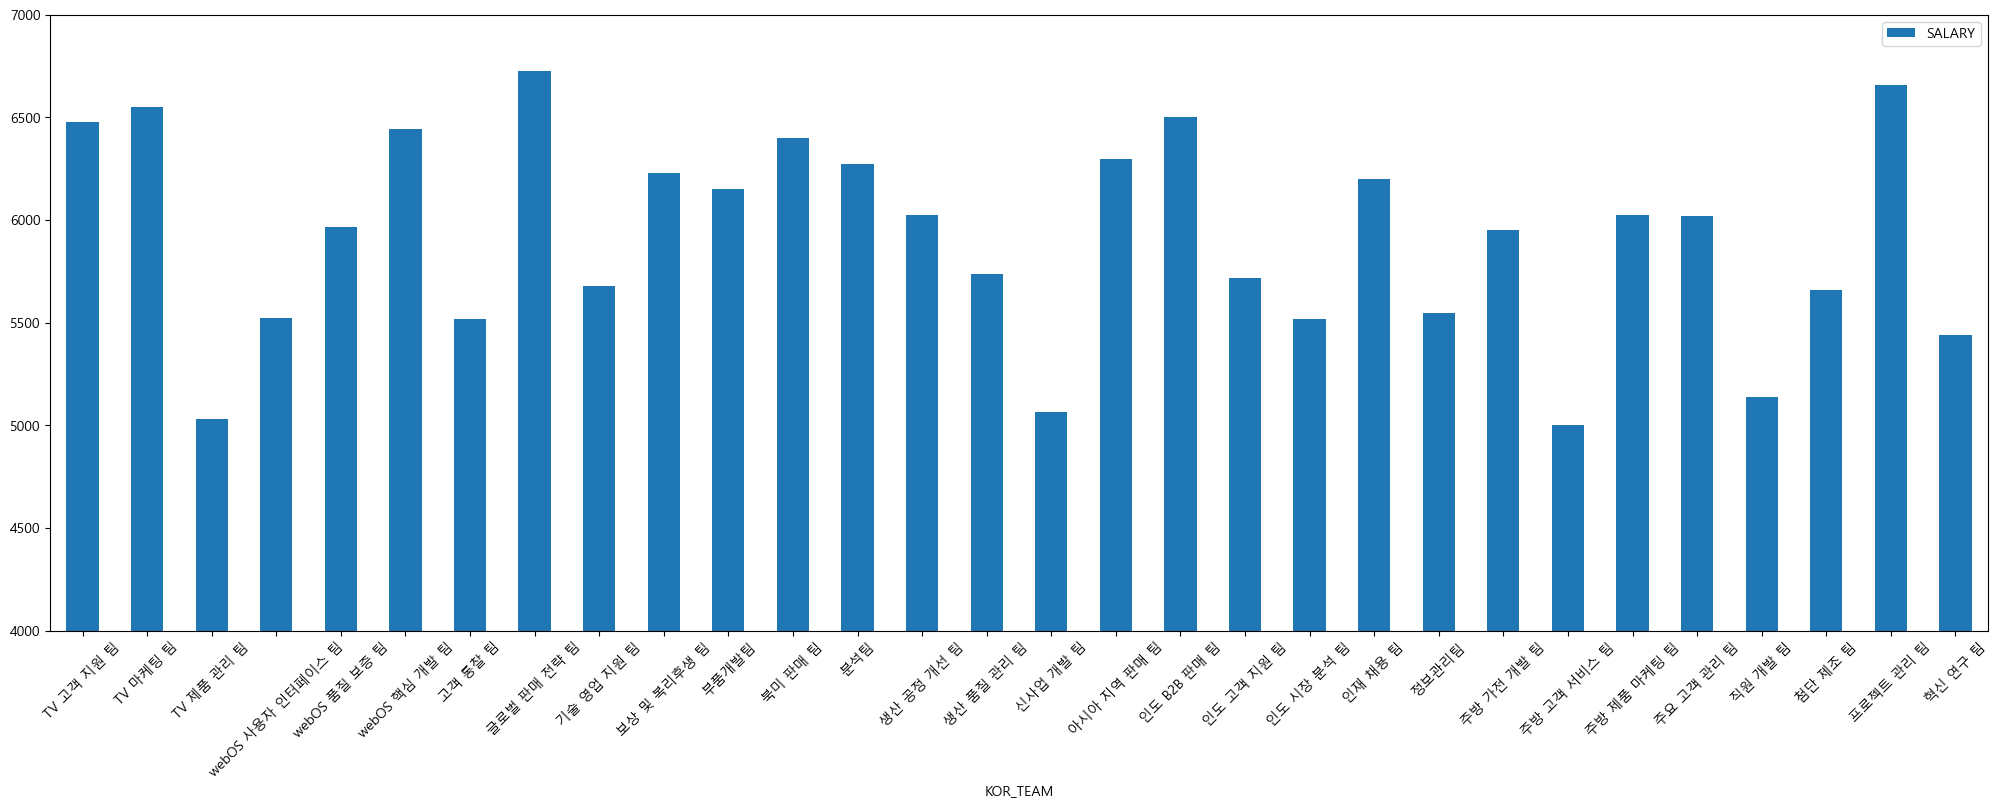

In [24]:
team_sal_mean.plot ( kind = 'bar', figsize=(25,8), rot =45, ylim = (4000,7000))

3. pie chart
   - 부서별 인원 수 확인

In [25]:
div_cnt = org_hr_merge['KOR_DIVISION'].value_counts()
#값들의 개수를 

<Axes: title={'center': '부서별 직원 비율'}, ylabel='count'>

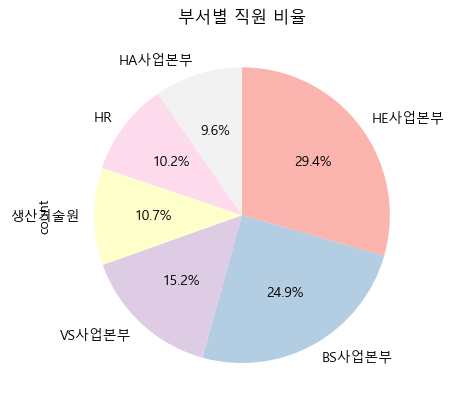

In [26]:
div_cnt.plot(kind = 'pie', colormap ='Pastel1', autopct ='%.1f%%', 
             startangle = 90, counterclock = False, title='부서별 직원 비율')

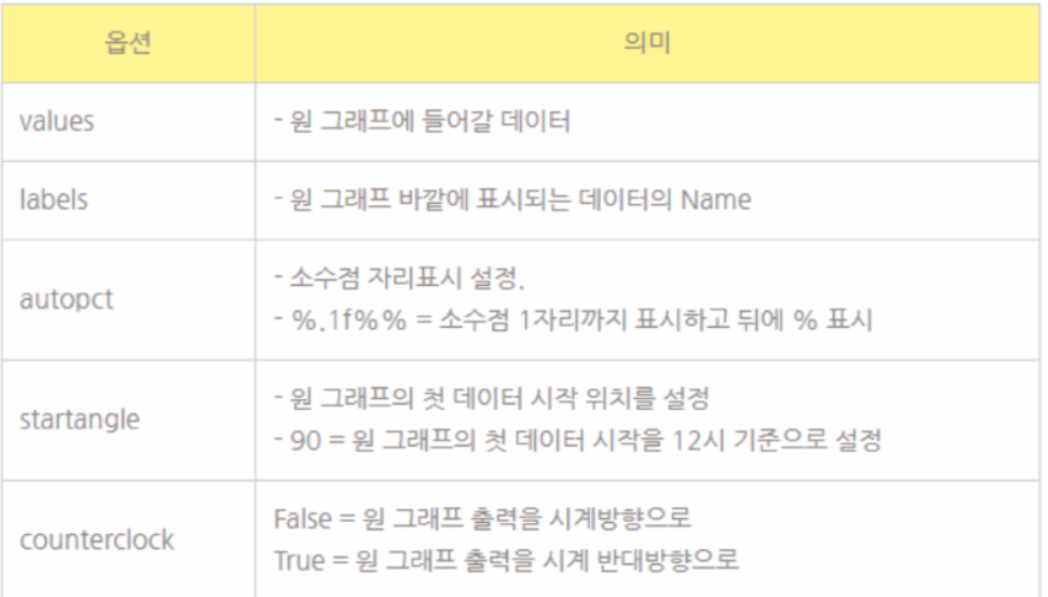

4. 산점도 (scatter)
   - 나이에 따른 연봉 변화 

<Axes: xlabel='AGE', ylabel='SALARY'>

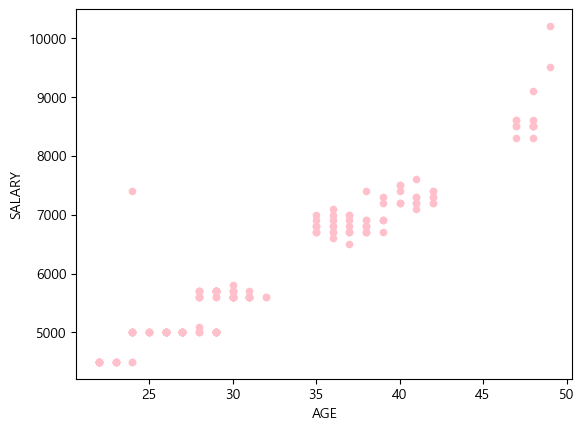

In [27]:
hr_info.plot(kind = 'scatter', x='AGE', y='SALARY', color= 'pink')

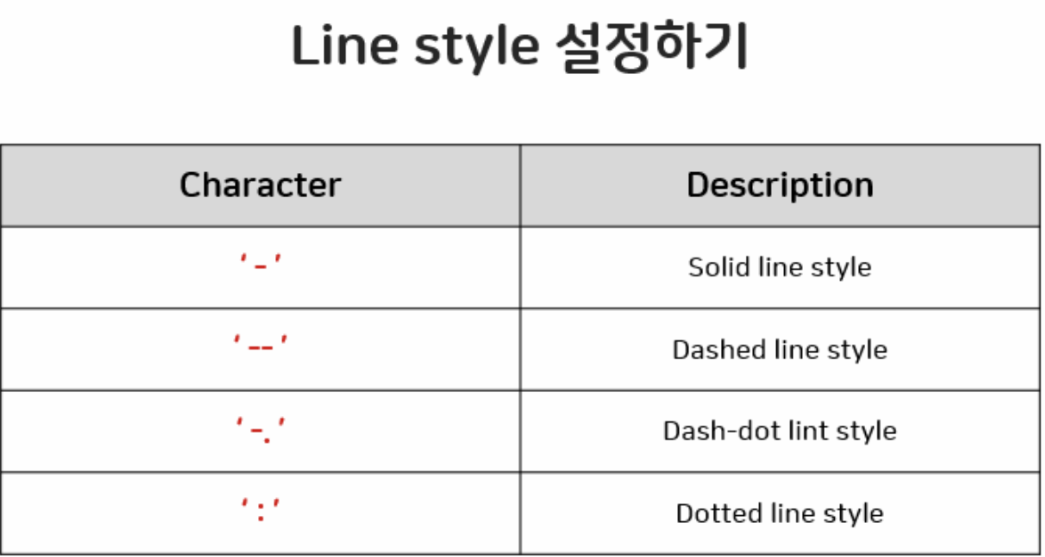

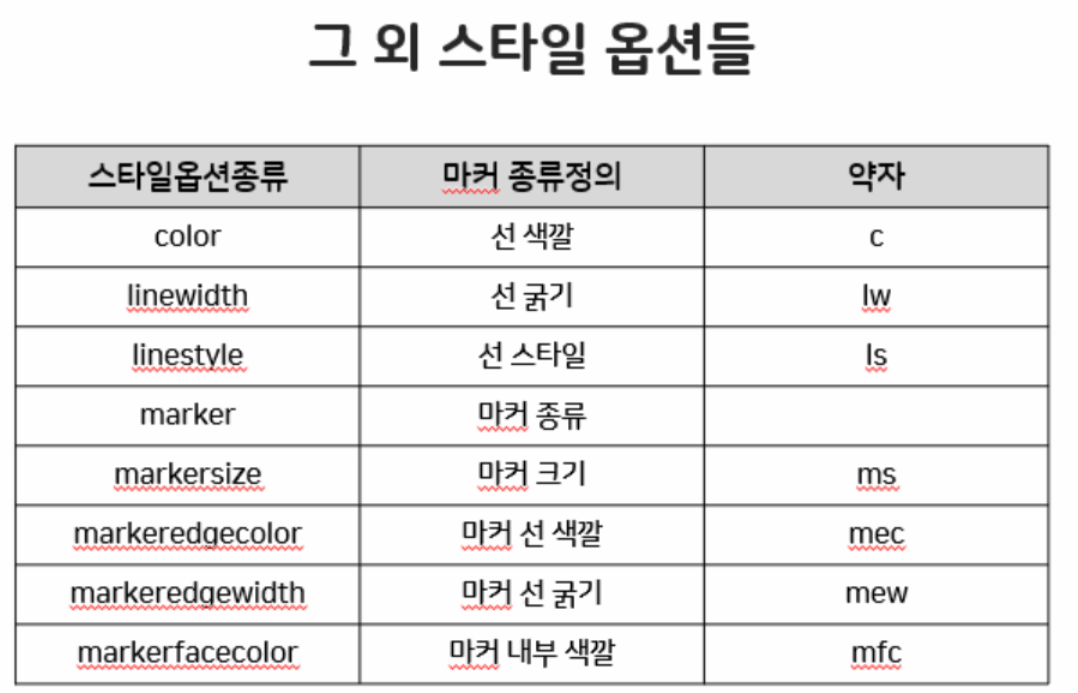

### Matplotlib 사용한 그래프 시각화

In [28]:
# plt.plo()은 line chart를 생성해주는 함수
# 하나의 데이터를 입력하면 값이 y축에 적용 
plt.plot

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

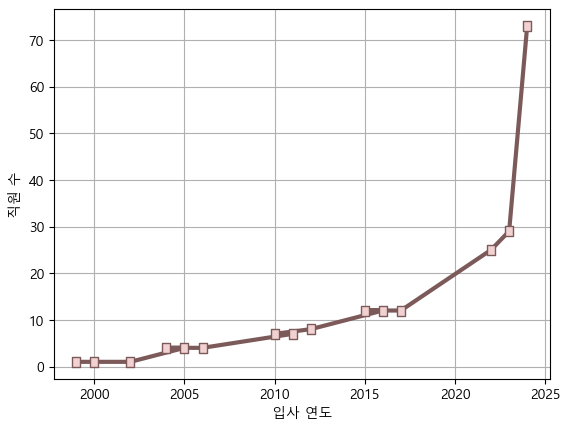

In [29]:
plt.plot(hire_year_info,
        ls='-',
        lw=3,
        marker='$.$',
        ms=7, 
        mfc = '#F1D1D1',
        color = '#7D5A5A')
plt.grid()
plt.ylabel( '직원 수' )
plt.xlabel('입사 연도')
plt.show() #그래프 출력 함수 

- 한 개의 차트에 여러 plot 그리기 

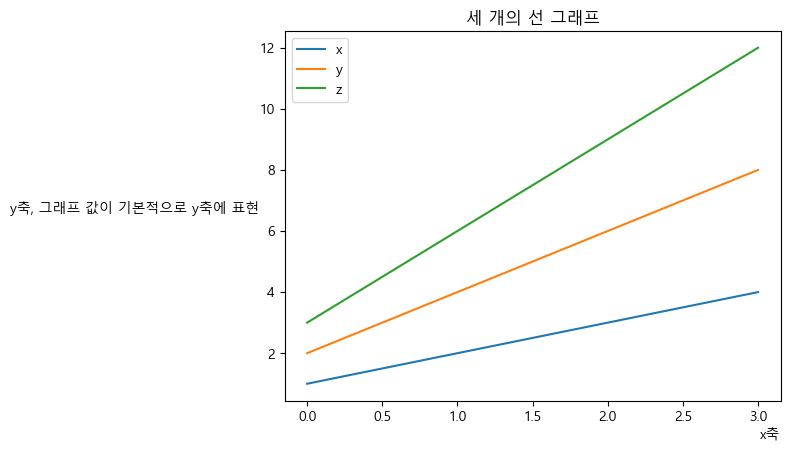

In [55]:
x = [ 1, 2, 3, 4]
y = [ 2, 4, 6, 8]
z = [ 3, 6, 9, 12]



plt.plot(x, label = 'x')
plt.plot(y, label = 'y')
plt.plot(z, label = 'z')
#legend()함수를 활용해서 이름표 달기. #범례(참고사항)
plt.legend(loc='best')  #위치도 조정 가능 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'
plt.title('세 개의 선 그래프')
plt.xlabel('x축', loc = 'right')
plt.ylabel('y축, 그래프 값이 기본적으로 y축에 표현', labelpad = 90).set_rotation(0)

plt.show() #그래프 출력 함수 #맨 아래에 붙이기 

#### legend( )함수
   - 종류 : 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

In [31]:
#bar 차트로 연도별 입사자 수 확인 
hire_year_info

HIRE_YEAR
1999     1
2000     1
2002     1
2005     4
2004     4
2006     4
2011     7
2010     7
2012     8
2016    12
2015    12
2017    12
2022    25
2023    29
2024    73
Name: count, dtype: int64

<BarContainer object of 15 artists>

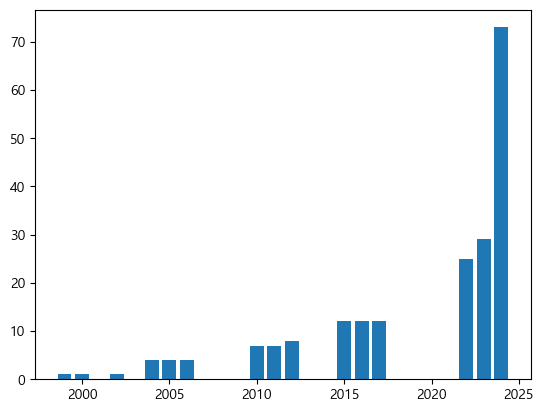

In [32]:
#bar chart를 그리기 위해 데이터 담기 '
#plt.plot(hire_year_info) 
#인덱스 , 값(직원수)
x = hire_year_info.index
y = hire_year_info.values
plt.bar(x,y)

In [33]:
#bar chart create

### 교통사고 데이터 분석 및 시각화

In [34]:
acc = pd.read_csv('./data/Traffic_Accident_2017.csv', encoding='EUC-KR')
acc.head


<bound method NDFrame.head of        발생년      발생년월일시  발생분  주야 요일  사망자수  사상자수  중상자수  경상자수  부상신고자수  ...  \
0     2017  2017010101   15  야간  일     1     2     1     0       0  ...   
1     2017  2017010102   28  야간  일     1     1     0     0       0  ...   
2     2017  2017010102   43  야간  일     1     2     0     1       0  ...   
3     2017  2017010102   22  야간  일     1     1     0     0       0  ...   
4     2017  2017010104   37  야간  일     1     1     0     0       0  ...   
...    ...         ...  ...  .. ..   ...   ...   ...   ...     ...  ...   
4060  2017  2017123118   10  야간  일     1     4     1     0       2  ...   
4061  2017  2017123118   25  야간  일     1     1     0     0       0  ...   
4062  2017  2017123119   55  야간  일     1     1     0     0       0  ...   
4063  2017  2017123120   40  야간  일     1    11     1     9       0  ...   
4064  2017  2017123123   15  야간  일     1     1     0     0       0  ...   

     도로형태_대분류   도로형태 당사자종별_1당_대분류  당사자종별_1당 당사자종별_2당_대분류 당사자종별_2당 발생위

In [35]:
acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4065 entries, 0 to 4064
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   발생년           4065 non-null   int64  
 1   발생년월일시        4065 non-null   int64  
 2   발생분           4065 non-null   int64  
 3   주야            4065 non-null   object 
 4   요일            4065 non-null   object 
 5   사망자수          4065 non-null   int64  
 6   사상자수          4065 non-null   int64  
 7   중상자수          4065 non-null   int64  
 8   경상자수          4065 non-null   int64  
 9   부상신고자수        4065 non-null   int64  
 10  발생지시도         4065 non-null   object 
 11  발생지시군구        4065 non-null   object 
 12  사고유형_대분류      4065 non-null   object 
 13  사고유형_중분류      4065 non-null   object 
 14  사고유형          4065 non-null   object 
 15  법규위반_대분류      4065 non-null   object 
 16  법규위반          4065 non-null   object 
 17  도로형태_대분류      4065 non-null   object 
 18  도로형태          4065 non-null 

- 요일별 교통사고 건수 시각화

In [36]:
#요일 정보 가져오기 
acc['요일'].unique()

array(['일', '월', '화', '수', '목', '금', '토'], dtype=object)

In [37]:
# 1. 요일별 교통사고 건수
res = acc['요일'].value_counts()
res

요일
화    608
월    603
금    603
토    596
목    586
수    565
일    504
Name: count, dtype: int64

In [38]:
#2. 월~일 순서로 표현 
# 2-1. '월' 데이터만 가져오기
res['월']
# 2-1. '월' '수' '금'데이터만 가져오기
res[['월','수','금']] 
# 2-2. '월~일 순서로 표현
week_acc= res[['월','화','수','목','금','토','일']] 
week_acc

요일
월    603
화    608
수    565
목    586
금    603
토    596
일    504
Name: count, dtype: int64

In [39]:
#bar차트로 요일별 교통사고 건수 만들기 

(450.0, 625.0)

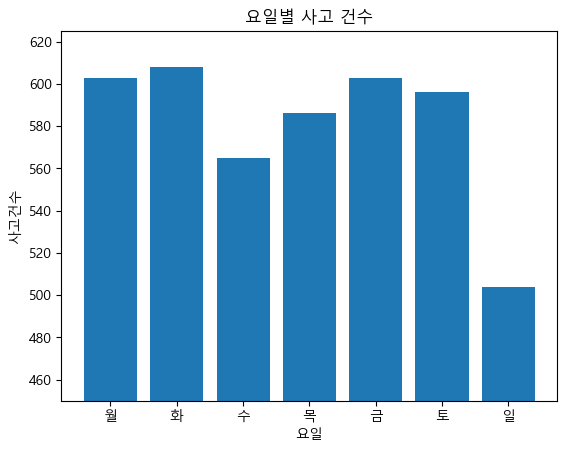

In [40]:
x = week_acc.index
y = week_acc.values

plt.bar(x,y)

plt.title('요일별 사고 건수')
plt.ylabel( '사고건수' )
plt.xlabel('요일')
plt.ylim(450,625)

- 차대차 사건 중 죽거나 다친사람(사망자 수)에 따른 발생지 시도 확인

In [41]:
acc

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2017,2017010101,15,야간,일,1,2,1,0,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,933501,1700129,126.768634,35.294464
1,2017,2017010102,28,야간,일,1,1,0,0,0,...,교차로,교차로부근,승용차,승용차,보행자,보행자,967570,1944453,127.133107,37.498741
2,2017,2017010102,43,야간,일,1,2,0,1,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,916497,1842880,126.566631,36.580069
3,2017,2017010102,22,야간,일,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,없음,없음,961608,1864573,127.069759,36.778505
4,2017,2017010104,37,야간,일,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,보행자,보행자,946778,1941695,126.898094,37.472946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4060,2017,2017123118,10,야간,일,1,4,1,0,2,...,단일로,기타단일로,화물차,화물차,화물차,화물차,1044531,1682838,127.988833,35.139774
4061,2017,2017123118,25,야간,일,1,1,0,0,0,...,단일로,기타단일로,원동기장치자전거,원동기장치자전거,없음,없음,1160683,1704380,129.267745,35.322087
4062,2017,2017123119,55,야간,일,1,1,0,0,0,...,단일로,기타단일로,화물차,화물차,없음,없음,1067639,1980346,128.268522,37.820351
4063,2017,2017123120,40,야간,일,1,11,1,9,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,961004,1987481,127.056525,37.886331


In [42]:
pd.set_option('display.max_columns',None)

In [43]:
acc.head(1)

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,법규위반_대분류,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2017,2017010101,15,야간,일,1,2,1,0,0,전남,장성군,차대차,기타,기타,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승용차,승용차,승용차,승용차,933501,1700129,126.768634,35.294464


In [44]:
#1. 차대차 사건 중 
#어떤 종류의 사고가 있는지 확인 
acc['사고유형_대분류'].unique()

array(['차대차', '차대사람', '차량단독', '철길건널목'], dtype=object)

In [45]:
#차대차인 사건만 가져오기 a
car_acc = acc[acc['사고유형_대분류']=='차대차']

In [46]:
car_acc.head(1)

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,법규위반_대분류,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2017,2017010101,15,야간,일,1,2,1,0,0,전남,장성군,차대차,기타,기타,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승용차,승용차,승용차,승용차,933501,1700129,126.768634,35.294464


In [47]:
#2.차대차 사건 중 죽거나 다친사람(사상자 수)에 따른 발생지 시도 

#사망자수, 발생지시도
res = car_acc[['사상자수','발생지시도']].groupby(by = '발생지시도').sum()
res

,사상자수
발생지시도,
강원,214
경기,824
경남,248
경북,287
광주,87
대구,115
대전,61
부산,107
서울,197


<BarContainer object of 17 artists>

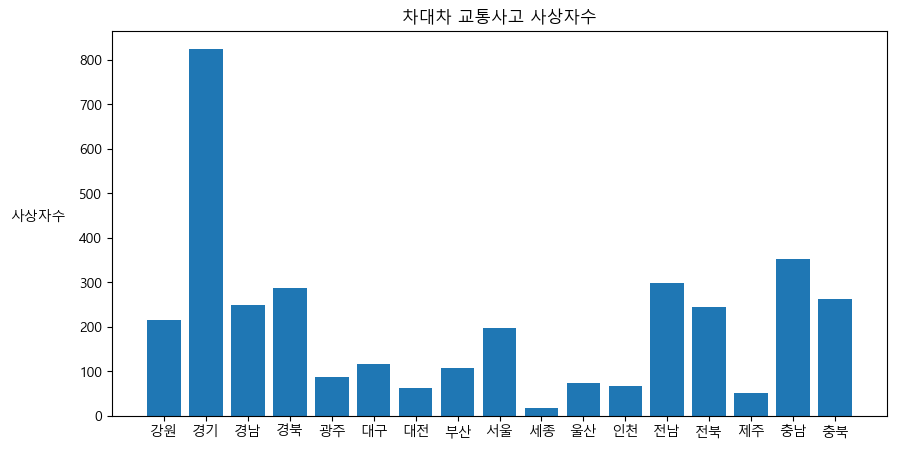

In [66]:
x = res.index
y= res['사상자수'].values
plt.figure(figsize =(10,5))

plt.title('차대차 교통사고 사상자수')
plt.ylabel('사상자수', labelpad =30).set_rotation(0)


plt.bar(x,y)
#1차원 데이터를 넣어야 함